In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WineQT.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Classification Using kNN , DecisionTreeClassifier and RandomForestClassifier

In [ ]:
x = df.drop(['quality'], axis = 1)
y = df['quality']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Training the data
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(x_train, y_train)
knn_model.fit(x_test, y_test)
y_pred = knn_model.predict(x_test)
print("Models train accuracy is : " , knn_model.score(x_train, y_train)*100,"%")
print("Models test accuracy is : " , knn_model.score(x_test, y_test)*100,"%")

Models train accuracy is :  44.63894967177243 %
Models test accuracy is :  65.93886462882097 %


In [ ]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
CV = cross_val_score(knn_model, x, y, cv = 10)
print("Cross-Validation score is : " , CV.mean()*100,"%")

Cross-Validation score is :  17.398932112890922 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
# HyperParameter Tuning
for i in range(1, 20):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_train, y_train)
  knn_model.fit(x_test, y_test)
  y_pred = knn_model.predict(x_test)
  print("Models accuracy is : " , knn_model.score(x_train, y_train)*100,"%")
  print("Models accuracy is : " , knn_model.score(x_test, y_test)*100,"%")
  print(f"for the i value of : {i}")

Models accuracy is :  44.74835886214442 %
Models accuracy is :  100.0 %
for the i value of : 1
Models accuracy is :  40.91903719912472 %
Models accuracy is :  75.10917030567686 %
for the i value of : 2
Models accuracy is :  39.27789934354486 %
Models accuracy is :  74.67248908296943 %
for the i value of : 3
Models accuracy is :  45.62363238512035 %
Models accuracy is :  71.61572052401746 %
for the i value of : 4
Models accuracy is :  44.63894967177243 %
Models accuracy is :  65.93886462882097 %
for the i value of : 5
Models accuracy is :  42.77899343544858 %
Models accuracy is :  61.572052401746724 %
for the i value of : 6
Models accuracy is :  42.34135667396061 %
Models accuracy is :  65.06550218340611 %
for the i value of : 7
Models accuracy is :  42.23194748358862 %
Models accuracy is :  62.882096069869 %
for the i value of : 8
Models accuracy is :  45.076586433260395 %
Models accuracy is :  60.698689956331876 %
for the i value of : 9
Models accuracy is :  44.52954048140044 %
Models

Models accuracy is :  53.39168490153173 %
Models accuracy is :  100.0 %
for the i value of : 1
Models accuracy is :  54.70459518599562 %
Models accuracy is :  81.22270742358079 %
for the i value of : 2
Models accuracy is :  55.36105032822757 %
Models accuracy is :  72.48908296943232 %
for the i value of : 3
Models accuracy is :  56.455142231947484 %
Models accuracy is :  68.5589519650655 %
for the i value of : 4
Models accuracy is :  57.330415754923415 %
Models accuracy is :  68.5589519650655 %
for the i value of : 5
Models accuracy is :  55.57986870897156 %
Models accuracy is :  68.5589519650655 %
for the i value of : 6
Models accuracy is :  56.78336980306346 %
Models accuracy is :  67.68558951965066 %
for the i value of : 7
Models accuracy is :  55.14223194748359 %
Models accuracy is :  67.24890829694323 %
for the i value of : 8
Models accuracy is :  56.89277899343544 %
Models accuracy is :  65.93886462882097 %
for the i value of : 9
Models accuracy is :  56.236323851203494 %
Models 

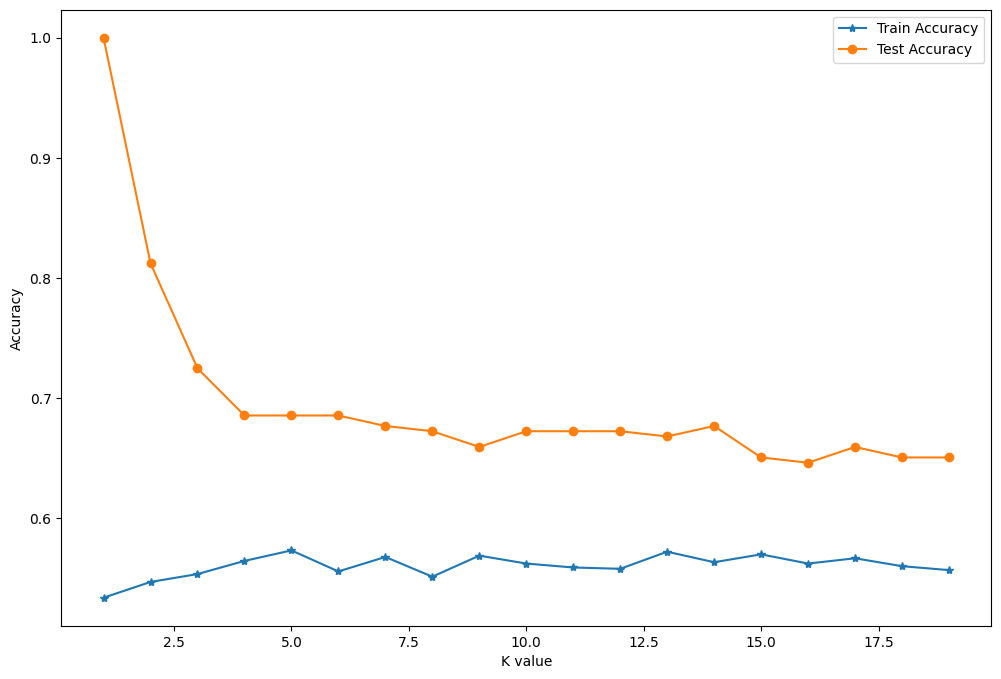

In [ ]:
# Scaling down the xtrain data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Again doing HPT
train_accuracy = []
test_accuracy = []
for i in range(1, 20):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_train, y_train)
  knn_model.fit(x_test, y_test)
  y_pred = knn_model.predict(x_test)
  print("Models accuracy is : " , knn_model.score(x_train, y_train)*100,"%")
  print("Models accuracy is : " , knn_model.score(x_test, y_test)*100,"%")
  train_accuracy.append(knn_model.score(x_train, y_train))
  test_accuracy.append(knn_model.score(x_test, y_test))
  print(f"for the i value of : {i}")
#Plotting
plt.figure(figsize = (12, 8))
plt.plot(range(1, 20), train_accuracy, label = 'Train Accuracy' , marker="*")
plt.plot(range(1, 20), test_accuracy, label = 'Test Accuracy' , marker="o")
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Grid Search cv - for best parameter
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : np.arange(1, 20)}
grid = GridSearchCV(knn, parameters)
grid.fit(x_train, y_train)
print("Best Parameter : "  , grid.best_params_)
print("Best Score : " , grid.best_score_*100)

Best Parameter :  {'n_neighbors': 10}
Best Score :  56.02113733261274


In [ ]:
#Doing Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
# Again kNN modeling on the basis of x_train_ros and y_train_ros
knn_model.fit(x_train_ros, y_train_ros)
knn_model.fit(x_test, y_test)
y_pred = knn_model.predict(x_test)
print("Models train accuracy is : " , knn_model.score(x_train_ros, y_train_ros)*100,"%")
print("Models test accuracy is : " , knn_model.score(x_test, y_test)*100,"%")
# HyperParameter Tuning
train_accuracy = []
test_accuracy = []
for i in range(1, 20):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_train_ros, y_train_ros)
  knn_model.fit(x_test, y_test)
  y_pred = knn_model.predict(x_test)
  print("Models train accuracy is : " , knn_model.score(x_train_ros, y_train_ros)*100,"%")
  print("Models test accuracy is : " , knn_model.score(x_test, y_test)*100,"%")
  train_accuracy.append(knn_model.score(x_train_ros, y_train_ros))
  test_accuracy.append(knn_model.score(x_test, y_test))
  print(f"for the i value of : {i}")


Models train accuracy is :  23.455178416013926 %
Models test accuracy is :  65.06550218340611 %
Models train accuracy is :  27.58920800696258 %
Models test accuracy is :  100.0 %
for the i value of : 1
Models train accuracy is :  27.067014795474325 %
Models test accuracy is :  81.22270742358079 %
for the i value of : 2
Models train accuracy is :  28.024369016536117 %
Models test accuracy is :  72.48908296943232 %
for the i value of : 3
Models train accuracy is :  26.414273281114014 %
Models test accuracy is :  68.5589519650655 %
for the i value of : 4
Models train accuracy is :  28.067885117493475 %
Models test accuracy is :  68.5589519650655 %
for the i value of : 5
Models train accuracy is :  25.892080069625763 %
Models test accuracy is :  68.5589519650655 %
for the i value of : 6
Models train accuracy is :  26.58833768494343 %
Models test accuracy is :  67.68558951965066 %
for the i value of : 7
Models train accuracy is :  25.50043516100957 %
Models test accuracy is :  67.2489082969

In [ ]:
# UnderSampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
# Again kNN modeling on the basis of x_train_rus and y_train_rus
knn_model.fit(x_train_rus, y_train_rus)
knn_model.fit(x_test, y_test)
y_pred = knn_model.predict(x_test)
print("Models train accuracy is : " , knn_model.score(x_train_rus, y_train_rus)*100,"%")
print("Models test accuracy is : " , knn_model.score(x_test, y_test)*100,"%")
#HyperParameter Tuning
train_accuracy = []
test_accuracy = []
for i in range(1, 20):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_train_rus, y_train_rus)
  knn_model.fit(x_test, y_test)
  y_pred = knn_model.predict(x_test)
  print("Models train accuracy is : " , knn_model.score(x_train_rus, y_train_rus)*100,"%")
  print("Models test accuracy is : " , knn_model.score(x_test, y_test)*100,"%")
  train_accuracy.append(knn_model.score(x_train_rus, y_train_rus))
  test_accuracy.append(knn_model.score(x_test, y_test))
  print(f"for the i value of : {i}")


Models train accuracy is :  23.333333333333332 %
Models test accuracy is :  65.06550218340611 %
Models train accuracy is :  33.33333333333333 %
Models test accuracy is :  100.0 %
for the i value of : 1
Models train accuracy is :  20.0 %
Models test accuracy is :  81.22270742358079 %
for the i value of : 2
Models train accuracy is :  30.0 %
Models test accuracy is :  72.48908296943232 %
for the i value of : 3
Models train accuracy is :  30.0 %
Models test accuracy is :  68.5589519650655 %
for the i value of : 4
Models train accuracy is :  40.0 %
Models test accuracy is :  68.5589519650655 %
for the i value of : 5
Models train accuracy is :  26.666666666666668 %
Models test accuracy is :  68.5589519650655 %
for the i value of : 6
Models train accuracy is :  33.33333333333333 %
Models test accuracy is :  67.68558951965066 %
for the i value of : 7
Models train accuracy is :  26.666666666666668 %
Models test accuracy is :  67.24890829694323 %
for the i value of : 8
Models train accuracy is 

Classification through Decision Tree classifier

Models accuracy is :  100.0 %
Cross-Validation score is :  42.870327993897796 %
Models Train accuracy is :  53.93873085339168 %
Models test accuracy is :  64.62882096069869 %
for the i value of : 1
Models Train accuracy is :  53.93873085339168 %
Models test accuracy is :  64.62882096069869 %
for the i value of : 2
Models Train accuracy is :  50.0 %
Models test accuracy is :  68.99563318777294 %
for the i value of : 3
Models Train accuracy is :  52.844638949671776 %
Models test accuracy is :  75.9825327510917 %
for the i value of : 4
Models Train accuracy is :  51.42231947483589 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Models test accuracy is :  81.6593886462882 %
for the i value of : 5
Models Train accuracy is :  50.76586433260394 %
Models test accuracy is :  86.8995633187773 %
for the i value of : 6
Models Train accuracy is :  50.65645514223195 %
Models test accuracy is :  90.82969432314411 %
for the i value of : 7
Models Train accuracy is :  51.3129102844639 %
Models test accuracy is :  92.57641921397381 %
for the i value of : 8
Models Train accuracy is :  51.3129102844639 %
Models test accuracy is :  96.06986899563319 %
for the i value of : 9
Models Train accuracy is :  51.64113785557986 %
Models test accuracy is :  97.37991266375546 %
for the i value of : 10
Models Train accuracy is :  48.6870897155361 %
Models test accuracy is :  98.68995633187772 %
for the i value of : 11
Models Train accuracy is :  50.32822757111597 %
Models test accuracy is :  99.56331877729258 %
for the i value of : 12
Models Train accuracy is :  49.89059080962801 %
Models test accuracy is :  100.0 %
for the i value of : 13

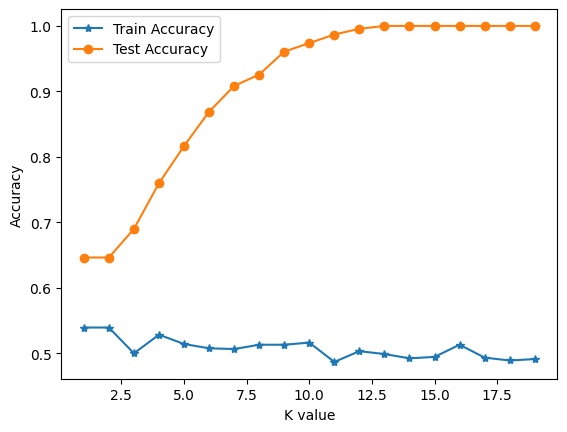

Best Parameter :  {'max_depth': 5}
Best Score :  58.75698072419383


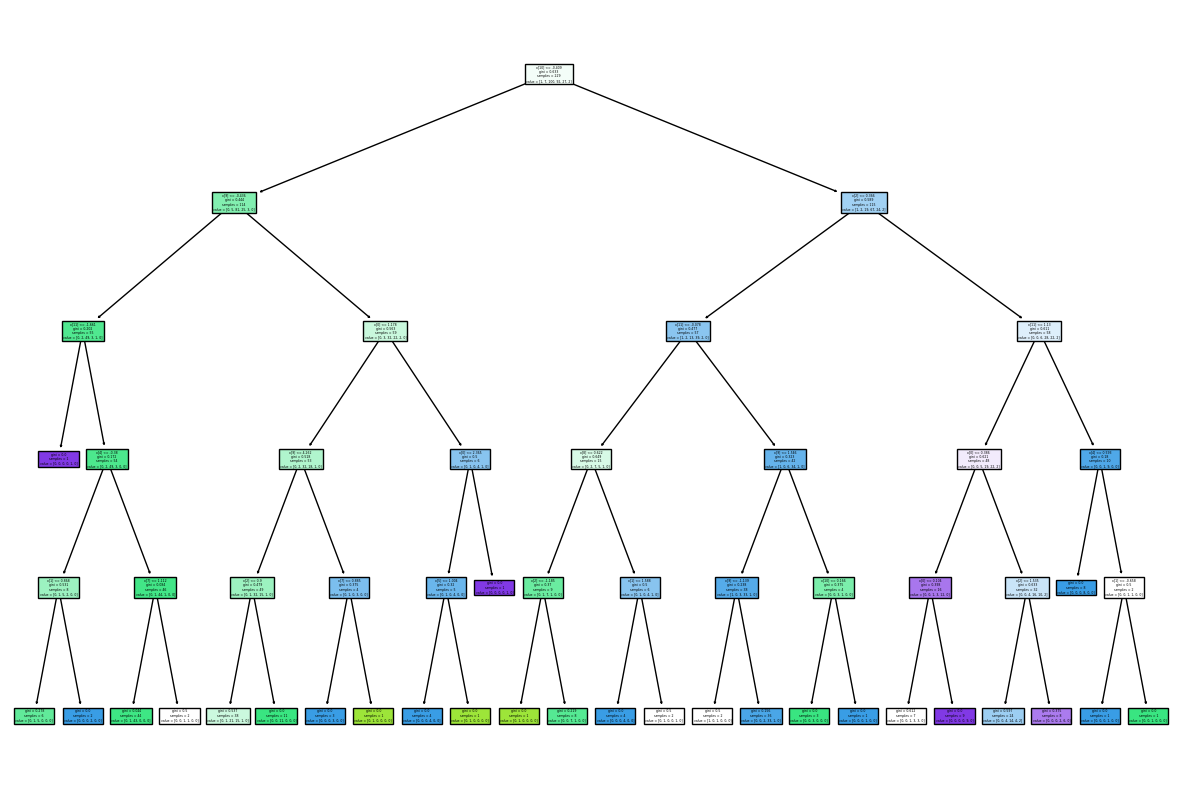

Models train accuracy is :  51.64113785557986 %
Models test accuracy is :  81.6593886462882 %
              precision    recall  f1-score   support

           3       0.50      1.00      0.67         1
           4       0.80      0.57      0.67         7
           5       0.81      0.92      0.86       100
           6       0.81      0.79      0.80        92
           7       0.89      0.63      0.74        27
           8       0.00      0.00      0.00         2

    accuracy                           0.82       229
   macro avg       0.64      0.65      0.62       229
weighted avg       0.81      0.82      0.81       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
dt_model.fit(x_test, y_test)
y_pred = dt_model.predict(x_test)
print("Models accuracy is : " , dt_model.score(x_test, y_test)*100,"%")
# Cross Validation
from sklearn.model_selection import cross_val_score
CV = cross_val_score(dt_model, x, y, cv = 10)
print("Cross-Validation score is : " , CV.mean()*100,"%")
# HyperParameter Tuning
train_accuracy = []
test_accuracy = []
for i in range(1, 20):
  dt_model = DecisionTreeClassifier(max_depth=i)
  dt_model.fit(x_train, y_train)
  dt_model.fit(x_test, y_test)
  y_pred = dt_model.predict(x_test)
  print("Models Train accuracy is : " , dt_model.score(x_train, y_train)*100,"%")
  print("Models test accuracy is : " , dt_model.score(x_test, y_test)*100,"%")
  train_accuracy.append(dt_model.score(x_train, y_train))
  test_accuracy.append(dt_model.score(x_test, y_test))
  print(f"for the i value of : {i}")
# Plotting
plt.plot(range(1, 20), train_accuracy, label = 'Train Accuracy' , marker="*")
plt.plot(range(1, 20), test_accuracy, label = 'Test Accuracy' , marker="o")
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Grid search CV  - for best parameter finding
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
parameters = {'max_depth' : np.arange(1, 20)}
grid = GridSearchCV(dt, parameters)
grid.fit(x_train, y_train)
print("Best Parameter : "  , grid.best_params_)
print("Best Score : " , grid.best_score_*100)
# Tree for max depth 5 :
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(x_train, y_train)
dt_model.fit(x_test, y_test)
y_pred = dt_model.predict(x_test)
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dt_model, filled = True)
plt.show()
print("Models train accuracy is : " , dt_model.score(x_train, y_train)*100,"%")
print("Models test accuracy is : " , dt_model.score(x_test, y_test)*100,"%")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
#Decision tree on OverSampled data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
# Making Model on the basis of x_train_ros and y_train_ros
dt_model.fit(x_train_ros, y_train_ros)
dt_model.fit(x_test, y_test)
y_pred = dt_model.predict(x_test)
print("Models train accuracy is : " , dt_model.score(x_train_ros, y_train_ros)*100,"%")
print("Models test accuracy is : " , dt_model.score(x_test, y_test)*100,"%")
# HyperParameter tuning
train_accuracy =[]
test_accuracy =[]
for i in range(1, 20):
  dt_model = DecisionTreeClassifier(max_depth=i)
  dt_model.fit(x_train_ros, y_train_ros)
  dt_model.fit(x_test, y_test)
  y_pred = dt_model.predict(x_test)
  print("Models train accuracy is : " , dt_model.score(x_train_ros, y_train_ros)*100,"%")
  print("Models test accuracy is : " , dt_model.score(x_test, y_test)*100,"%")
  train_accuracy.append(dt_model.score(x_train_ros, y_train_ros))
  test_accuracy.append(dt_model.score(x_test, y_test))
  print(f"for the i value of : {i}")

Models train accuracy is :  24.412532637075717 %
Models test accuracy is :  81.6593886462882 %
Models train accuracy is :  21.801566579634464 %
Models test accuracy is :  64.62882096069869 %
for the i value of : 1
Models train accuracy is :  21.801566579634464 %
Models test accuracy is :  64.62882096069869 %
for the i value of : 2
Models train accuracy is :  27.415143603133156 %
Models test accuracy is :  68.99563318777294 %
for the i value of : 3
Models train accuracy is :  24.891209747606617 %
Models test accuracy is :  75.9825327510917 %
for the i value of : 4
Models train accuracy is :  24.412532637075717 %
Models test accuracy is :  81.6593886462882 %
for the i value of : 5
Models train accuracy is :  25.108790252393387 %
Models test accuracy is :  86.8995633187773 %
for the i value of : 6
Models train accuracy is :  25.06527415143603 %
Models test accuracy is :  90.82969432314411 %
for the i value of : 7
Models train accuracy is :  26.979982593559615 %
Models test accuracy is :  

In [ ]:
# Decision Tree for undersampled data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
# Making Model on the basis of x_train_rus and y_train_rus
dt_model.fit(x_train_rus, y_train_rus)
dt_model.fit(x_test, y_test)
y_pred = dt_model.predict(x_test)
print("Models train accuracy is : " , dt_model.score(x_train_rus, y_train_rus)*100,"%")
print("Models test accuracy is : " , dt_model.score(x_test, y_test)*100,"%")
# Hyper Parameter Tuning
train_accuracy =[]
test_accuracy =[]
for i in range(1, 20):
  dt_model = DecisionTreeClassifier(max_depth=i)
  dt_model.fit(x_train_rus, y_train_rus)
  dt_model.fit(x_test, y_test)
  y_pred = dt_model.predict(x_test)
  print("Models train accuracy is : " , dt_model.score(x_train_rus, y_train_rus)*100,"%")
  print("Models test accuracy is : " , dt_model.score(x_test, y_test)*100)
  train_accuracy.append(dt_model.score(x_train_rus, y_train_rus))
  test_accuracy.append(dt_model.score(x_test, y_test))
  print(f"for the i value of : {i}")

Models train accuracy is :  26.666666666666668 %
Models test accuracy is :  100.0 %
Models train accuracy is :  20.0 %
Models test accuracy is :  64.62882096069869
for the i value of : 1
Models train accuracy is :  20.0 %
Models test accuracy is :  64.62882096069869
for the i value of : 2
Models train accuracy is :  33.33333333333333 %
Models test accuracy is :  68.99563318777294
for the i value of : 3
Models train accuracy is :  36.666666666666664 %
Models test accuracy is :  75.9825327510917
for the i value of : 4
Models train accuracy is :  26.666666666666668 %
Models test accuracy is :  81.6593886462882
for the i value of : 5
Models train accuracy is :  26.666666666666668 %
Models test accuracy is :  86.8995633187773
for the i value of : 6
Models train accuracy is :  26.666666666666668 %
Models test accuracy is :  90.82969432314411
for the i value of : 7
Models train accuracy is :  30.0 %
Models test accuracy is :  92.57641921397381
for the i value of : 8
Models train accuracy is :

Classification Through Random Forest Classifier

Models train accuracy is :  57.65864332603938 %
Models test accuracy is :  100.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation score is :  54.60183066361556 %
Models Train accuracy is :  46.2800875273523 %
Models test accuracy is :  81.6593886462882 %
for the i value of : 1
Models Train accuracy is :  46.17067833698031 %
Models test accuracy is :  80.34934497816593 %
for the i value of : 2
Models Train accuracy is :  49.671772428884026 %
Models test accuracy is :  90.82969432314411 %
for the i value of : 3
Models Train accuracy is :  51.64113785557986 %
Models test accuracy is :  91.70305676855895 %
for the i value of : 4
Models Train accuracy is :  52.516411378555794 %
Models test accuracy is :  96.50655021834062 %
for the i value of : 5
Models Train accuracy is :  54.92341356673961 %
Models test accuracy is :  96.06986899563319 %
for the i value of : 6
Models Train accuracy is :  54.92341356673961 %
Models test accuracy is :  98.68995633187772 %
for the i value of : 7
Models Train accuracy is :  56.236323851203494 %
Models test accuracy is :  97.81659388646288 %
for the i value of : 8
Models

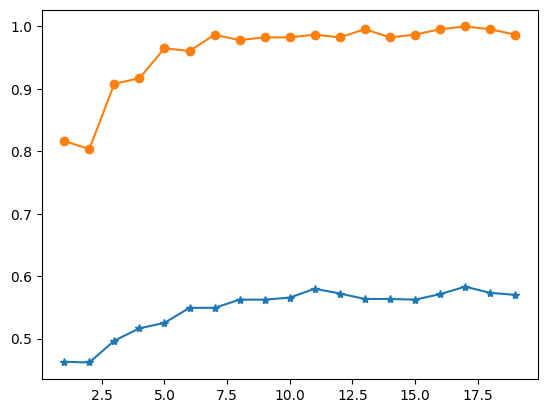

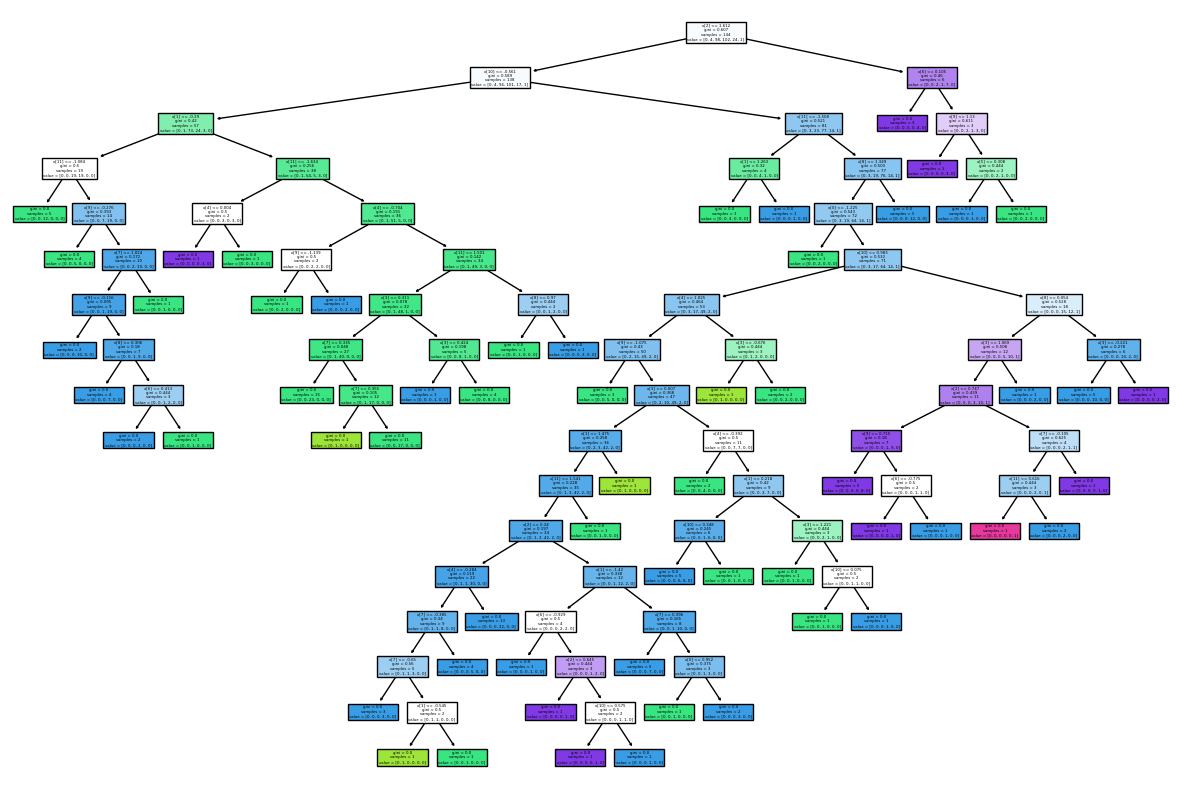

Models train accuracy is :  55.68927789934355 %
Models test accuracy is :  68.5589519650655 %
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.89      0.81       100
           6       0.62      0.74      0.68        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.23      0.27      0.25       229
weighted avg       0.57      0.69      0.63       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_model.fit(x_test, y_test)
y_pred = rf_model.predict(x_test)
print("Models train accuracy is : " , rf_model.score(x_train, y_train)*100,"%")
print("Models test accuracy is : " , rf_model.score(x_test, y_test)*100,"%")
#Cross validation
from sklearn.model_selection import cross_val_score
CV = cross_val_score(rf_model, x, y, cv = 10)
print("Cross-Validation score is : " , CV.mean()*100,"%")
# Hyper Parameter Tuning
train_accuracy = []
test_accuracy = []
for i in range(1, 20):
  rf_model = RandomForestClassifier(n_estimators=i)
  rf_model.fit(x_train, y_train)
  rf_model.fit(x_test, y_test)
  y_pred = rf_model.predict(x_test)
  print("Models Train accuracy is : " , rf_model.score(x_train, y_train)*100,"%")
  print("Models test accuracy is : " , rf_model.score(x_test, y_test)*100,"%")
  train_accuracy.append(rf_model.score(x_train, y_train))
  test_accuracy.append(rf_model.score(x_test, y_test))
  print(f"for the i value of : {i}")
#plotting
plt.plot(range(1, 20), train_accuracy, label = 'Train Accuracy' , marker="*")
plt.plot(range(1, 20), test_accuracy, label = 'Test Accuracy' , marker="o")
#Grid search cv -for best params
grid = GridSearchCV(rf_model, {'n_estimators':[20,40 , 60 , 80 , 100] , 'max_depth':[2,3,4,5] , 'max_leaf_nodes':[2,3,4]})
grid.fit(x_train, y_train)
print("Best Parameter : "  , grid.best_params_)
print("Best Score : " , grid.best_score_*100)
# plotting a tree
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(rf_model[0], filled = True)
plt.show()
# model for 'max_depth': 4, 'max_leaf_nodes': 4, 'n_estimators': 100
rf_model = RandomForestClassifier(max_depth=4, max_leaf_nodes=4, n_estimators=100)
rf_model.fit(x_train, y_train)
rf_model.fit(x_test, y_test)
y_pred = rf_model.predict(x_test)
print("Models train accuracy is : " , rf_model.score(x_train, y_train)*100,"%")
print("Models test accuracy is : " , rf_model.score(x_test, y_test)*100,"%")
# Classication report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
#OverSampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)
# doing knn on this OverSampled data
model_ros = KNeighborsClassifier(n_neighbors = 5)
model_ros.fit(x_train_ros, y_train_ros)
model_ros.fit(x_test, y_test)
y_pred = model_ros.predict(x_test)
print("Models train accuracy is : " , model_ros.score(x_train_ros, y_train_ros)*100,"%")
print("Models test accuracy is : " , model_ros.score(x_test, y_test)*100,"%")


Models train accuracy is :  28.067885117493475 %
Models test accuracy is :  68.5589519650655 %


In [ ]:
# UnderSampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)
# doing for knn
model_rus = KNeighborsClassifier(n_neighbors = 5)
model_rus.fit(x_train_rus, y_train_rus)
model_rus.fit(x_test, y_test)
y_pred = model_rus.predict(x_test)
print("Models train accuracy is : " , model_rus.score(x_train_rus, y_train_rus)*100,"%")
print("Models test accuracy is : " , model_rus.score(x_test, y_test)*100,"%")

Models train accuracy is :  40.0 %
Models test accuracy is :  68.5589519650655 %


In [ ]:
# classification report of every model
from sklearn.metrics import classification_report
print("Classification report of knn model")
print(classification_report(y_test, knn_model.predict(x_test)))
print("Classification report of Decision Tree model")
print(classification_report(y_test, dt_model.predict(x_test)))
print("Classification report of Random Forest model")
print(classification_report(y_test, rf_model.predict(x_test)))


Classification report of knn model
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.83      0.77       100
           6       0.60      0.71      0.65        92
           7       0.20      0.04      0.06        27
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.25      0.26      0.25       229
weighted avg       0.58      0.65      0.60       229

Classification report of Decision Tree model
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00       100
           6       1.00      1.00      1.00        92
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Regression - simple Linear Regression on feature = "alcohol" and target_column ="quality"

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
# Regression
X = df[['alcohol']]
y = df[['quality']]
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.fit(x_test, y_test)
y_pred = reg.predict(x_test)
print("Models train accuracy is : " , reg.score(x_train, y_train)*100,"%")
print("Models test accuracy is : " , reg.score(x_test, y_test)*100,"%")
# Cross Validation
from sklearn.model_selection import cross_val_score
CV = cross_val_score(reg, X, y, cv = 10)
print("Cross-Validation score is : " , CV.mean()*100,"%")


Models train accuracy is :  24.010407574824967 %
Models test accuracy is :  19.396763656415605 %
Cross-Validation score is :  12.407134743302631 %


In [ ]:
# Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error : " , mean_squared_error(y_test, y_pred))
print("R2 Score : " , r2_score(y_test, y_pred))

Mean Squared Error :  0.5449990568964772
R2 Score :  0.19396763656415605


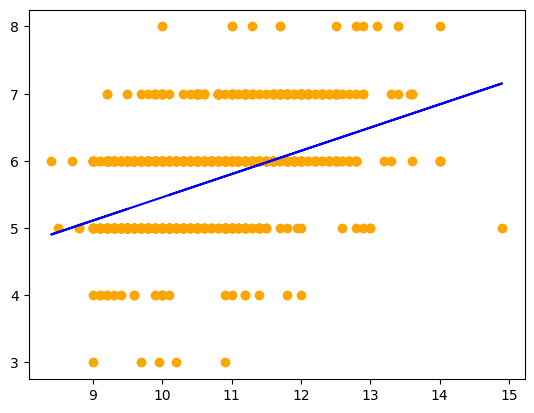

In [ ]:
# Plotting
plt.scatter(x_train, y_train, color = 'orange')
plt.plot(x_train, reg.predict(x_train), color = 'blue')

Regression - Correlation and Non-Linearity

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [ ]:
# Identifying Top 3 features most correlated with target variable ("quality")
df_ide = pd.DataFrame(df.corr()['quality'].sort_values(ascending = False))
df_top3 = df_ide[df_ide['quality'] < 1.000]
df_top3.head(3)

,quality
alcohol,0.484866
sulphates,0.257710
citric acid,0.240821


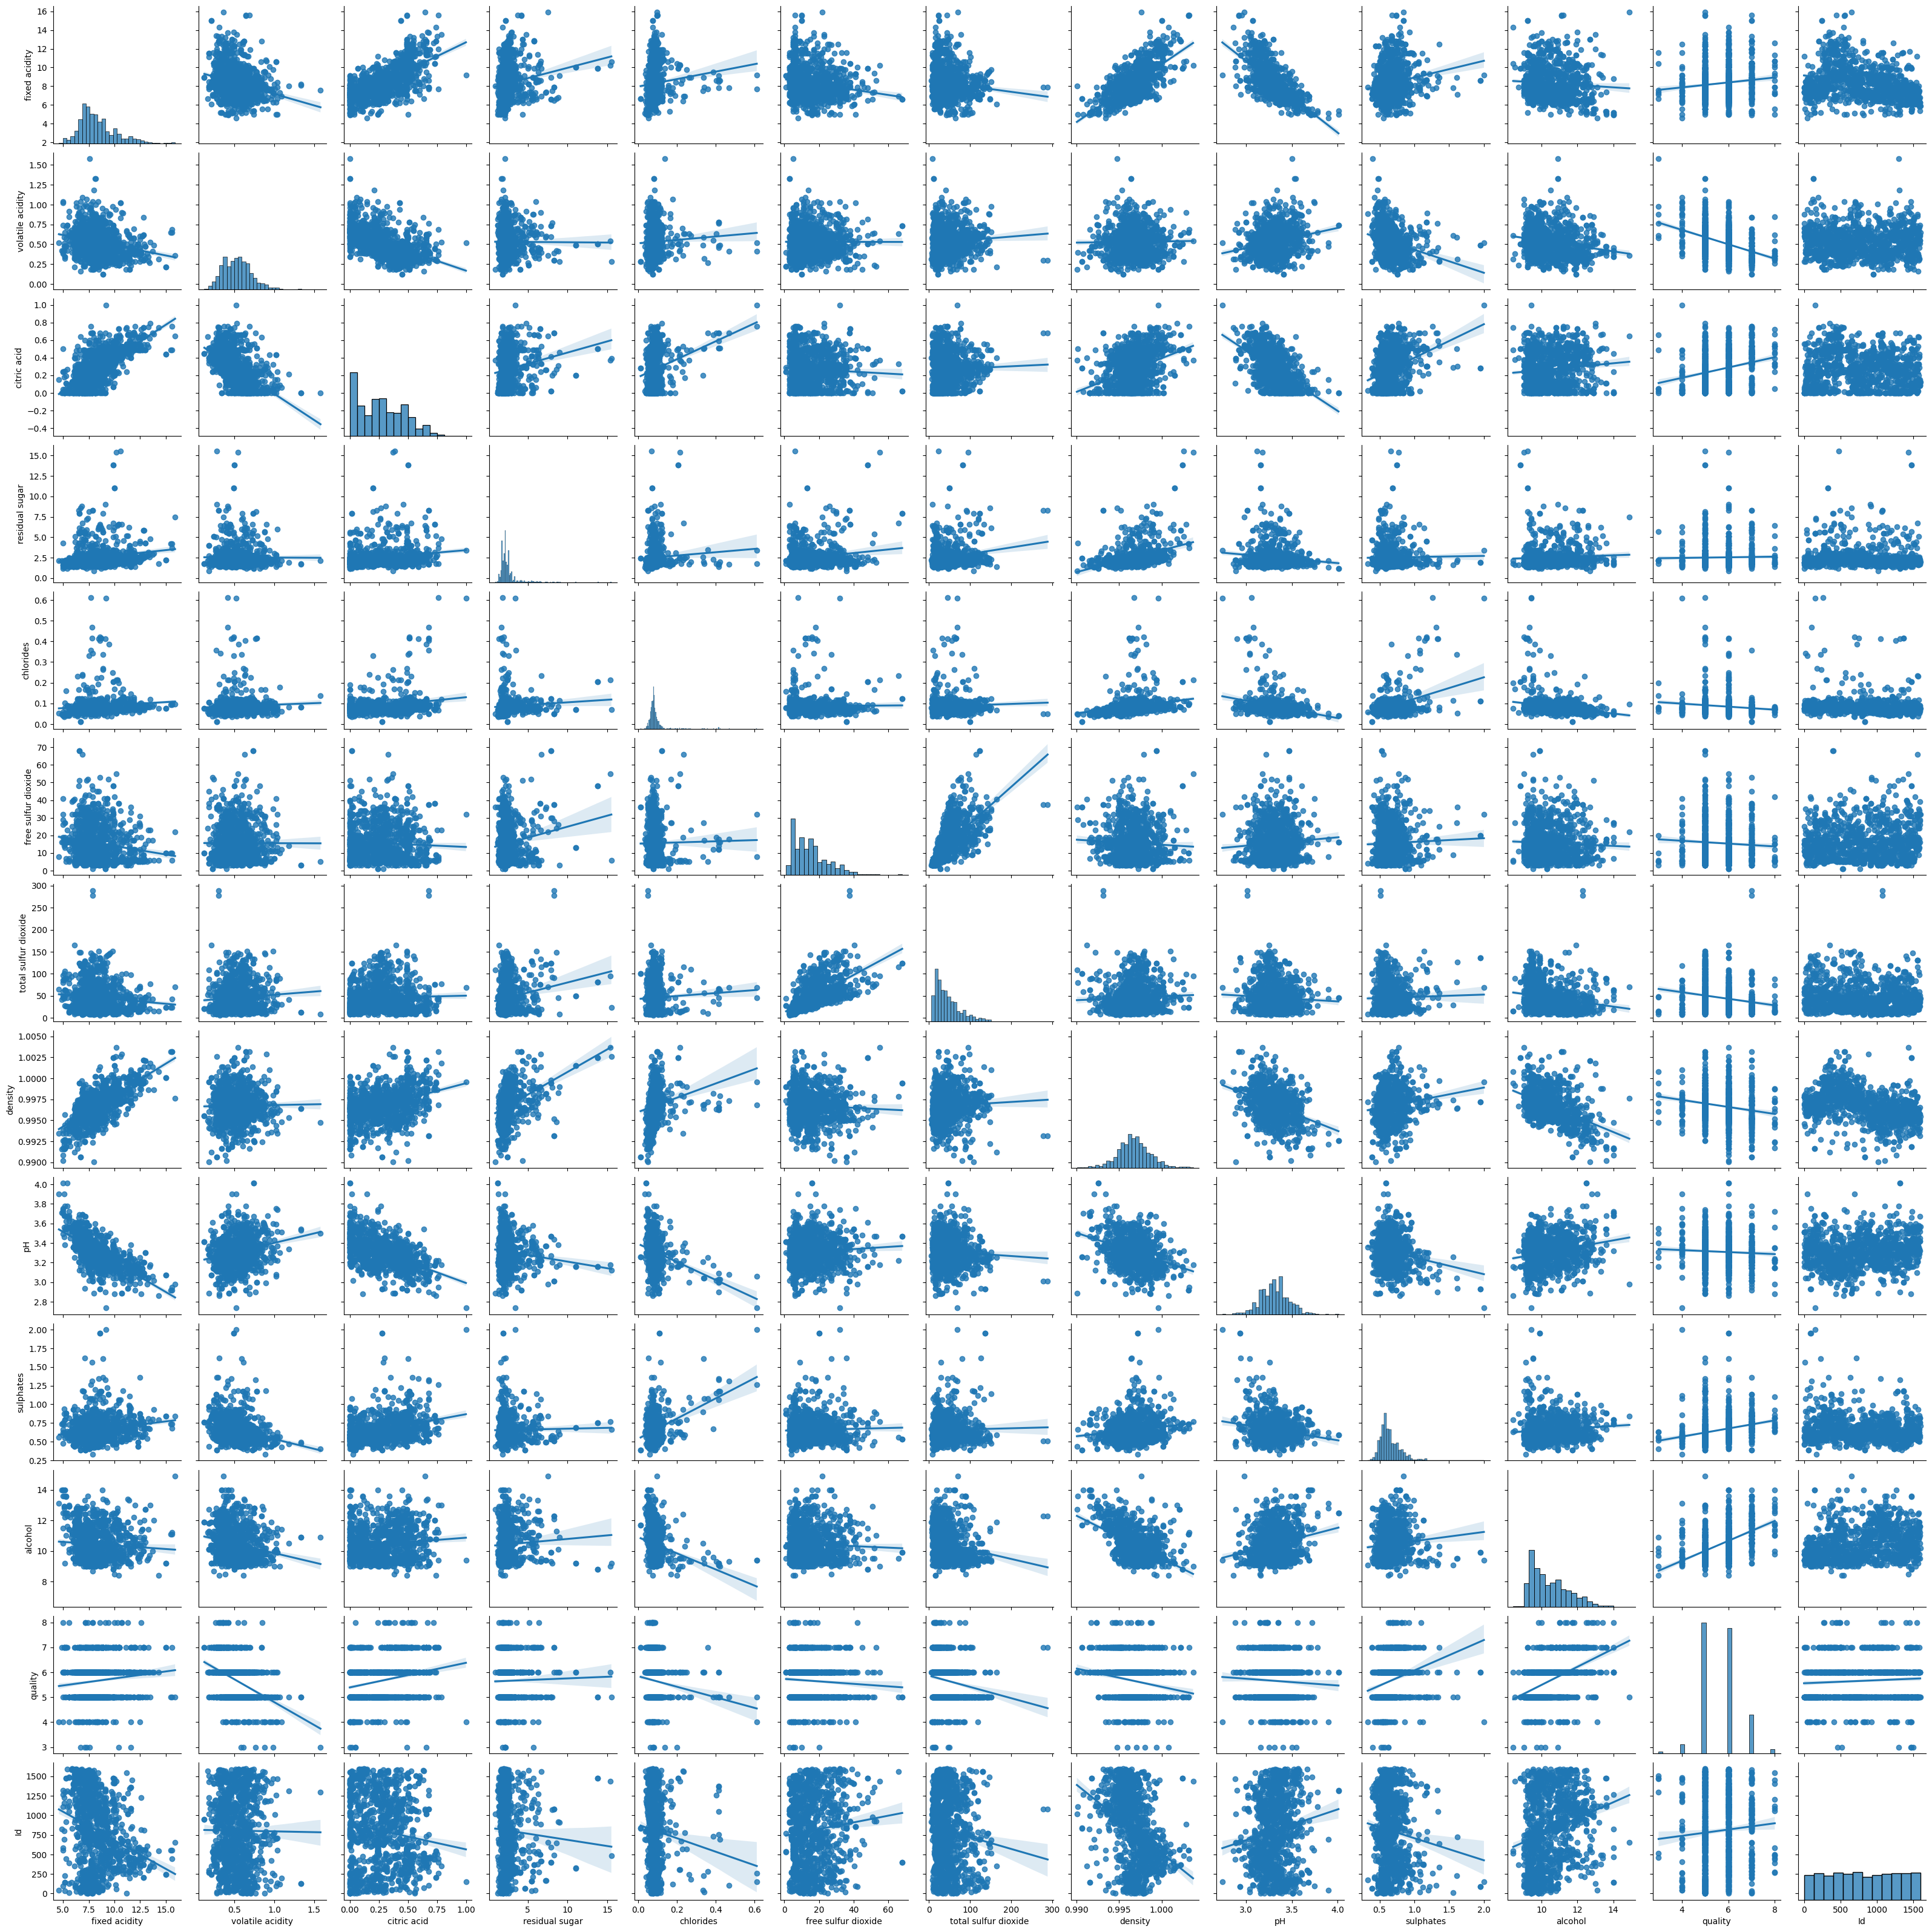

In [ ]:
# Checking for non-linearity in the relationship between these features and the target variable
# by plotting scatter plots with regression lines.
sns.pairplot(df , kind='reg')

Unsupervised Data - Clustering

In [ ]:
# Applying Kmeans clustering to the dataset to identify clusters of wine samples

from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(df)
df['cluster'] = model.predict(df)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,1


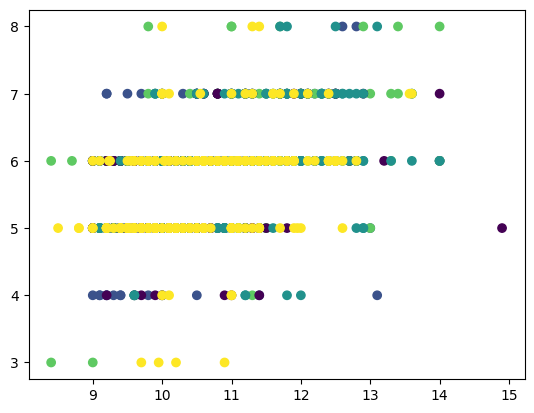

In [ ]:
# plotting
plt.scatter(df['alcohol'], df['quality'], c=df['cluster'])

In [ ]:
# Elbow method
losses =[]
for i in range(1,20):
  model = KMeans(n_clusters=i)
  model.fit(df)
  losses.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

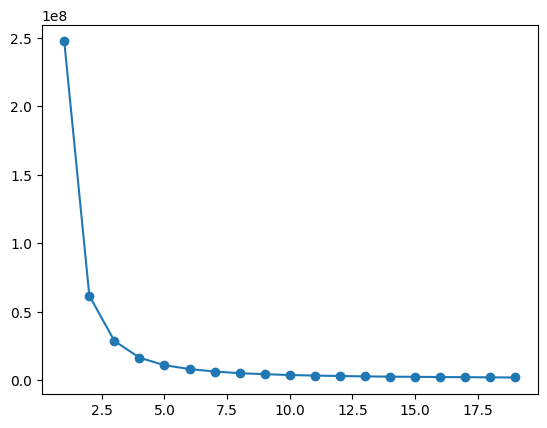

In [ ]:
# plotting Model inertia
plt.plot(range(1,20), losses , marker="o")



***---from the above plot we can conclude that 4 number of clusters would be optimal ***




In [ ]:
# Modeling with 4 clusters
model = KMeans(n_clusters=4)
model.fit(df)
df['cluster'] = model.predict(df)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


Visualizing the clusters using a scatter plot of the two most important features identified by PCA

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,2


In [ ]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'cluster'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_ratio_)
X_pca = pca.transform(df)
print(X_pca.shape)

[0.99458208 0.00514068]
(1143, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


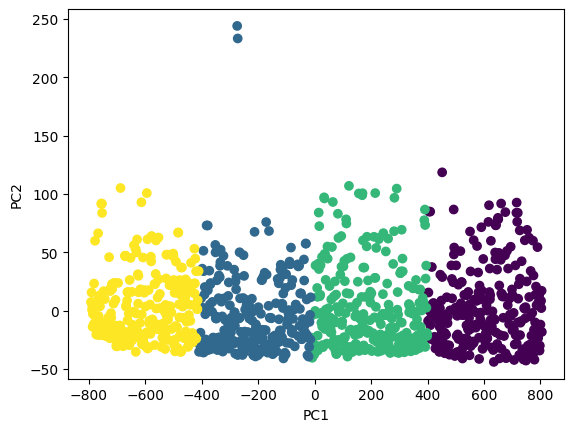

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Association Rule Mining for Recommendation System

In [ ]:

dfx =df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for col in dfx.columns:
    #print(col , "-" , (df[col] > df[col].median()))
    dfx[col] = (dfx[col] > dfx[col].median()).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Transforming the dataset into a binary matrix format suitable for association rule mining.
# df['quality'].unique()
# dfx = df.groupby(['alcohol' ,'quality' ])['density'].mean().unstack().fillna(0)
# dfx.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# dfx.loc[8.4][dfx.loc[8.4] != 0]

quality
3    0.9994
6    1.0008
Name: 8.4, dtype: float64

In [ ]:
# def prepare_data(value):
#   if value > 0:
#     return True
#   else:
#     return False
# dfx = dfx.applymap(prepare_data)
# dfx

quality,3,4,5,6,7,8
alcohol,,,,,,
8.400000,True,False,False,True,False,False
8.500000,False,False,True,False,False,False
8.700000,False,False,False,True,False,False
8.800000,False,False,True,False,False,False
9.000000,True,True,True,True,False,False
...,...,...,...,...,...,...
13.400000,False,False,False,False,True,True
13.566667,False,False,False,False,True,False
13.600000,False,False,False,True,True,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(dfx, min_support=0.05, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.488189,(fixed acidity)
1,0.492563,(volatile acidity)
2,0.493438,(citric acid)
3,0.447069,(residual sugar)
4,0.489064,(chlorides)
...,...,...
909,0.057743,"(sulphates, fixed acidity, free sulfur dioxide..."
910,0.055118,"(volatile acidity, free sulfur dioxide, residu..."
911,0.060367,"(free sulfur dioxide, residual sugar, citric a..."
912,0.054243,"(sulphates, free sulfur dioxide, citric acid, ..."


In [ ]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(fixed acidity),(citric acid),0.488189,0.493438,0.352581,0.722222,1.463652,0.111690,1.823622,0.618935
1,(citric acid),(fixed acidity),0.493438,0.488189,0.352581,0.714539,1.463652,0.111690,1.792928,0.625349
2,(fixed acidity),(residual sugar),0.488189,0.447069,0.270341,0.553763,1.238653,0.052087,1.239098,0.376450
3,(residual sugar),(fixed acidity),0.447069,0.488189,0.270341,0.604697,1.238653,0.052087,1.294730,0.348455
4,(fixed acidity),(chlorides),0.488189,0.489064,0.286089,0.586022,1.198251,0.047334,1.234209,0.323265


In [ ]:
rules1['antecedents'] = rules1['antecedents'].apply(lambda x: list(x))
rules1['consequents'] = rules1['consequents'].apply(lambda x: list(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules1[['antecedents', 'consequents']].to_csv('recommend.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
r1 = pd.read_csv('/content/recommend.csv' , index_col=0)
r1.head(15)
def converter_of_Brackets(text):
  return text.replace("[", "").replace("]", "")
r1['antecedents'] = r1['antecedents'].apply(converter_of_Brackets)
r1['consequents'] = r1['consequents'].apply(converter_of_Brackets)
r1.head(50)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents
0,'fixed acidity','citric acid'
1,'citric acid','fixed acidity'
2,'fixed acidity','residual sugar'
3,'residual sugar','fixed acidity'
4,'fixed acidity','chlorides'
5,'chlorides','fixed acidity'
6,'fixed acidity','density'
7,'density','fixed acidity'
8,'fixed acidity','sulphates'
9,'sulphates','fixed acidity'


In [ ]:
wine_quality = "4"
p = r1[r1['antecedents'].str.contains(wine_quality)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
 p.consequents.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Series([], Name: consequents, dtype: object)

Principal Component Analysis

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']
# Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.9) + 1
X_pca = pca.transform(X)
print(X_pca.shape)

[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06 4.84244753e-06 2.20273048e-06 1.92915255e-07
 1.04077842e-07 5.36135178e-08 4.63023037e-08 6.48743761e-09
 2.49010517e-12]
(1143, 13)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# HyperParameter tuning
for i in range(1, 13):
  pca = PCA(n_components=i)
  pca.fit(X)
  X_pca = pca.transform(X)
  print(pca.explained_variance_ratio_)
  print(X_pca.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.99458272]
(1143, 1)
[0.99458272 0.00514058]
(1143, 2)
[9.94582721e-01 5.14058370e-03 2.47991590e-04]
(1143, 3)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05]
(1143, 4)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06]
(1143, 5)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06 4.84244753e-06]
(1143, 6)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06 4.84244753e-06 2.20273048e-06]
(1143, 7)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06 4.84244753e-06 2.20273048e-06 1.92915255e-07]
(1143, 8)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06 4.84244753e-06 2.20273048e-06 1.92915255e-07
 1.04077842e-07]
(1143, 9)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-05
 7.56728849e-06 4.84244753e-06 2.20273048e-06 1.92915255e-07
 1.04077842e-07 5.36135178e-08]
(1143, 10)
[9.94582721e-01 5.14058370e-03 2.47991590e-04 1.36881288e-

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


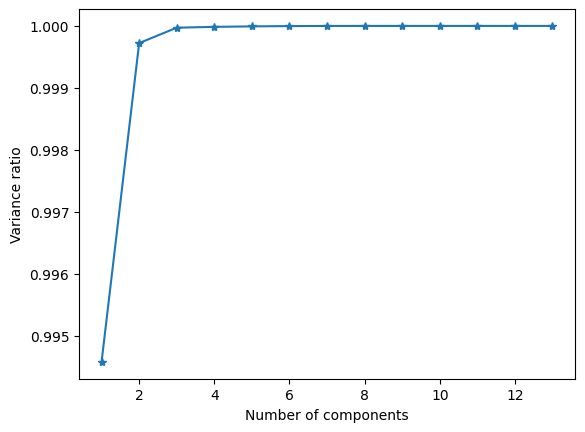

(1143, 1)


In [ ]:
# Plotting the number of components as a function of variance ratio
plt.plot(range(1, len(explained_variance)+1), explained_variance , marker="*")
plt.xlabel('Number of components')
plt.ylabel('Variance ratio')
plt.show()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

In [ ]:
# Performing algorithms on the decomposed dataset(With PCA)
# Random Forest
xtrain , xtest , ytrain , ytest = train_test_split(X_pca , y , test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
model_rf_PCA = RandomForestClassifier()
model_rf_PCA.fit(xtrain, ytrain)
model_rf_PCA.fit(xtest, ytest)
Acc_PCA_train = model_rf_PCA.score(xtrain, ytrain)
Acc_PCA_test = model_rf_PCA.score(xtest, ytest)
print("Models train accuracy is : " , model_rf_PCA.score(xtrain, ytrain)*100,"%")
print("Models test accuracy is : " , model_rf_PCA.score(xtest, ytest)*100,"%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Models train accuracy is :  57.439824945295406 %
Models test accuracy is :  100.0 %


In [ ]:
# Performing Random Forest without PCA
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.2)
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(xtrain, ytrain)
model_rf.fit(xtest, ytest)
Acc_train = model_rf.score(xtrain, ytrain)
Acc_test = model_rf.score(xtest, ytest)
print("Models train accuracy is : " , model_rf.score(xtrain, ytrain)*100,"%")
print("Models test accuracy is : " , model_rf.score(xtest, ytest)*100,"%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Models train accuracy is :  58.97155361050328 %
Models test accuracy is :  100.0 %


Comprehensive Analysis

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df.drop('quality', axis=1)
y = df['quality']
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(X , y , test_size = 0.2)
pipe  = Pipeline([('pca', PCA()), ('rf', RandomForestClassifier())])
pipe.fit(xtrain, ytrain)
pipe.fit(xtest, ytest)
# Comparing Accuracy of both the algo with PCA and without PCA
print("Accuracy of train data : " , pipe.score(xtrain, ytrain)*100,"%")
print("Accuracy of test data : " , pipe.score(xtest , ytest)*100,"%")
print("Accuracy of the model without PCA : ")
print("Train accuracy : " , Acc_train*100,"%")
print("Test accuracy : "  ,Acc_test*100,"%")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy of train data :  57.330415754923415 %
Accuracy of test data :  100.0 %
Accuracy of the model without PCA : 
Train accuracy :  58.97155361050328 %
Test accuracy :  100.0 %
